In [45]:
import yfinance as yf
import pandas as pd

In [46]:
tickers = ['WIPRO.NS', 'ITC.NS', 'RELIANCE.NS', 'BAJFINANCE.NS', 'MARUTI.NS']

In [47]:
start_date ='2019-01-01'
end_date = '2025-01-01'

In [48]:
data_dict = {}

In [49]:
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.index = pd.to_datetime(data.index)
    data.dropna(inplace=True)        # Clearing the row having NA (Data Cleaning)
    data_dict[ticker] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [50]:
data_dict

{'WIPRO.NS': Price            Close        High         Low        Open    Volume
 Ticker        WIPRO.NS    WIPRO.NS    WIPRO.NS    WIPRO.NS  WIPRO.NS
 Date                                                                
 2019-01-01  119.624214  121.858125  119.166445  121.125695   4036542
 2019-01-02  119.221375  121.327112  118.287523  120.411574   8822139
 2019-01-03  119.203064  120.100288  118.305840  119.752387   9446080
 2019-01-04  118.818527  119.697445  117.060699  118.836841   6414073
 2019-01-07  118.745293  119.660831  118.031176  119.422789   5076276
 ...                ...         ...         ...         ...       ...
 2024-12-24  299.351624  303.175661  296.900333  301.508771   8837902
 2024-12-26  299.106476  300.969481  298.076946  299.449663   6516148
 2024-12-27  303.077606  304.842524  298.763340  299.253598   8063921
 2024-12-30  297.782806  303.371731  296.753246  303.077588  13709891
 2024-12-31  295.968842  297.096429  289.497428  295.086383   9337030
 
 [1481

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#plotting (Reliance)

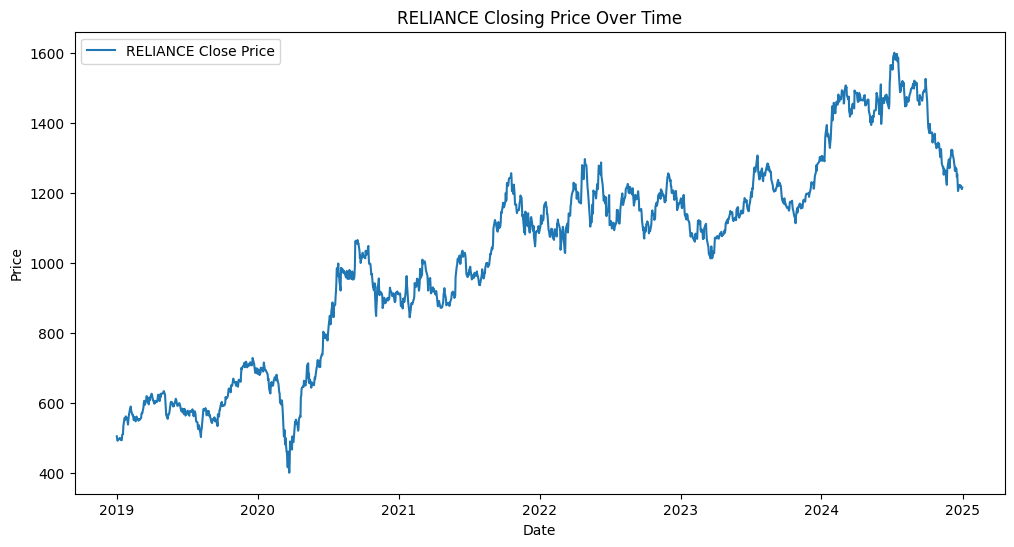

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(data_dict['RELIANCE.NS']['Close'], label='RELIANCE Close Price')
plt.title('RELIANCE Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
#calculating simple moving average 20 and 50 for aapl for 1 day tine frame


In [58]:
data_dict['RELIANCE.NS']['MA20'] = data_dict['RELIANCE.NS']['Close'].rolling(window=20).mean()
data_dict['RELIANCE.NS']['MA50'] = data_dict['RELIANCE.NS']['Close'].rolling(window=50).mean()

In [59]:
#ploting simple moving average for aapl


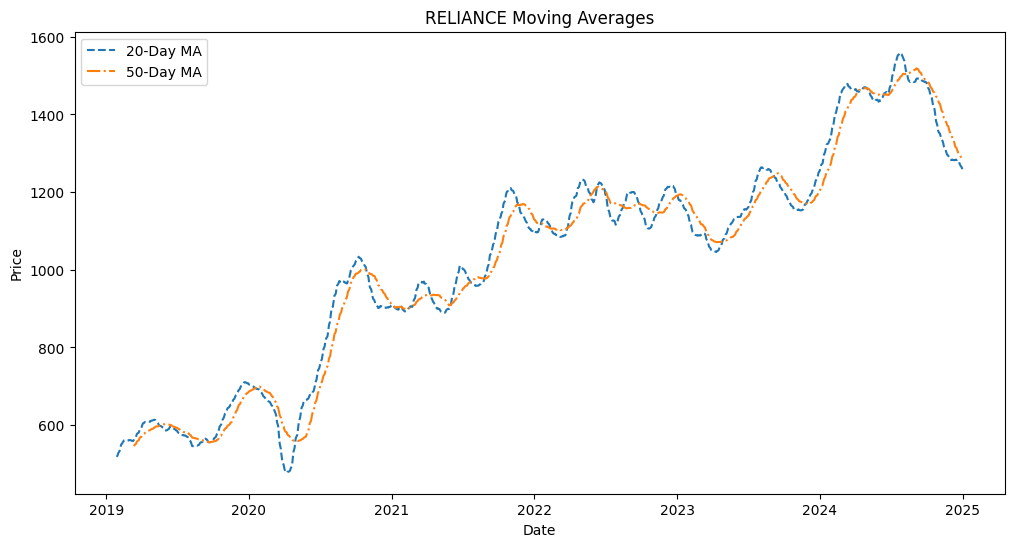

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(data_dict['RELIANCE.NS']['MA20'], label='20-Day MA', linestyle='--')
plt.plot(data_dict['RELIANCE.NS']['MA50'], label='50-Day MA', linestyle='-.')
plt.title('RELIANCE Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
aapl = data_dict['RELIANCE.NS'].copy()
aapl['Return'] = aapl['Close'].pct_change()
aapl['Lag_1'] = aapl['Close'].shift(1)
aapl['Lag_2'] = aapl['Close'].shift(2)
aapl['Rolling_Mean_5'] = aapl['Close'].rolling(window=5).mean()
aapl['Rolling_Std_5'] = aapl['Close'].rolling(window=5).std()
aapl.dropna(inplace=True)

In [63]:
aapl

Price,Close,High,Low,Open,Volume,MA20,MA50,Return,Lag_1,Lag_2,Rolling_Mean_5,Rolling_Std_5
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,
Date,,,,,,,,,,,,
2019-03-13,605.526184,611.233988,596.897004,600.896997,24577591,562.482520,545.399198,0.011980,598.357666,586.110596,586.074597,16.085154
2019-03-14,602.941956,612.132946,600.492505,606.627352,22753310,564.395996,547.381665,-0.004268,605.526184,598.357666,592.483557,14.863613
2019-03-15,593.998230,610.694783,589.301599,604.492551,34764353,566.585883,549.316492,-0.014833,602.941956,605.526184,597.386926,7.692319
2019-03-18,606.762207,610.312777,597.301561,598.200409,22104063,568.958914,551.629294,0.021488,593.998230,602.941956,601.517249,5.294562
2019-03-19,618.672241,620.222784,603.638559,611.234004,21448030,572.474634,554.127264,0.019629,606.762207,593.998230,605.580164,8.858668
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,1222.750000,1233.550049,1221.000000,1222.300049,6734917,1273.640009,1296.582507,0.000368,1222.300049,1205.300049,1226.810010,17.405632
2024-12-26,1216.550049,1227.699951,1214.250000,1224.250000,10016178,1269.807513,1293.463008,-0.005070,1222.750000,1222.300049,1219.470020,9.335959


In [18]:
#modeling

In [64]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x400 with 0 Axes>

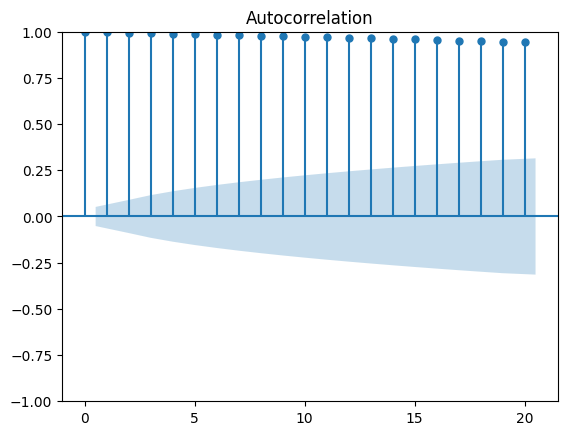

<Figure size 1200x400 with 0 Axes>

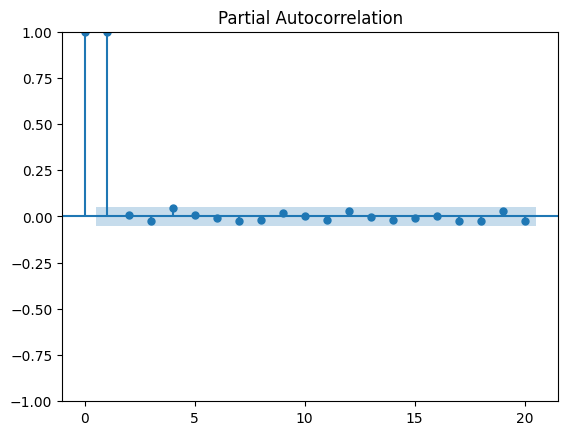

In [66]:
plt.figure(figsize=(12, 4))
plot_acf(aapl['Close'], lags=20)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(aapl['Close'], lags=20)
plt.show()


In [67]:
arima_model = sm.tsa.ARIMA(aapl['Close'], order=(1, 1, 1))
arima_result = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [68]:
forecast_steps = 30
arima_forecast = arima_result.forecast(steps=forecast_steps)
print("ARIMA Forecast:\n", arima_forecast)

ARIMA Forecast:
 1432    1215.086923
1433    1215.376485
1434    1215.145522
1435    1215.329745
1436    1215.182803
1437    1215.300008
1438    1215.206522
1439    1215.281089
1440    1215.221612
1441    1215.269053
1442    1215.231213
1443    1215.261395
1444    1215.237321
1445    1215.256523
1446    1215.241207
1447    1215.253424
1448    1215.243679
1449    1215.251452
1450    1215.245252
1451    1215.250197
1452    1215.246253
1453    1215.249399
1454    1215.246890
1455    1215.248891
1456    1215.247295
1457    1215.248568
1458    1215.247552
1459    1215.248362
1460    1215.247716
1461    1215.248232
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
features = ['Lag_1', 'Lag_2', 'Rolling_Mean_5', 'Rolling_Std_5']
target = 'Close'
X = aapl[features]
y = aapl[target]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [72]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
y_pred = xgb_model.predict(X_test)
print(y_pred)

[1148.0533 1139.1334 1145.2849 1162.9059 1162.2859 1170.4418 1162.2859
 1170.4418 1155.1437 1156.2126 1155.1437 1171.762  1168.7549 1169.9108
 1178.6265 1185.8318 1184.129  1186.5831 1194.4165 1194.4165 1194.4165
 1191.5458 1196.6005 1202.6864 1214.4309 1219.0621 1218.787  1218.787
 1218.787  1213.8634 1218.478  1220.7996 1245.4922 1255.7535 1253.5967
 1264.7019 1272.0837 1273.6362 1274.6224 1273.6362 1273.6362 1273.6362
 1273.6362 1273.6362 1273.6362 1273.6362 1273.6362 1273.6362 1276.073
 1252.4846 1250.4891 1250.4891 1255.0159 1276.073  1274.0001 1274.0001
 1274.7358 1276.9902 1276.8749 1250.4891 1250.4891 1250.4891 1250.4891
 1282.7319 1274.7358 1276.073  1276.073  1274.6224 1274.0001 1274.0001
 1273.6362 1274.0001 1274.6224 1274.6224 1273.6362 1273.6362 1273.6362
 1273.6362 1273.9114 1274.6224 1273.6362 1276.073  1276.8749 1276.8749
 1255.651  1255.651  1274.7358 1274.6224 1277.6263 1276.8749 1255.0159
 1255.651  1255.6896 1255.651  1273.6362 1273.9114 1276.073  1274.6224
 1274.62

In [83]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)


In [84]:
mape = (abs((y_test.squeeze() - y_pred.squeeze()) / y_test.squeeze()).mean()) * 100

In [85]:
print(f"Gradient Boosting - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")

Gradient Boosting - RMSE: 165.31, MAE: 136.04, MAPE: 9.28%
